In [31]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from selenium import webdriver
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des données

In [60]:
driver = webdriver.Firefox(executable_path=r'geckodriver.exe')
original_link='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
driver.get(original_link)
links = driver.find_elements_by_xpath('//tr/td/a')

list_url=[]

for link in links:
    list_url.append(link.get_attribute("href"))
    
list_url.reverse()
list_url.pop()

'https://archive.ics.uci.edu/ml/machine-learning-databases/'

In [61]:
for url in list_url:
    urllib.request.urlretrieve(url, "./" + url.split('/')[6])  

# Chargement des données

In [7]:
red=pd.read_csv('./winequality-red.csv', sep = ';')
white=pd.read_csv('./winequality-white.csv', sep = ';')

In [8]:
white['red']=0
red['red']=1

concat=[red, white]

wine=pd.concat(concat)

wine = shuffle(wine).reset_index(drop=True)

# Exploration des données

In [6]:
#type des variables
print(wine.dtypes)

(6497, 13)


In [8]:
#dimension du dataset
print(wine.shape)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red                        bool
dtype: object


In [10]:
#Describe du dataset
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [11]:
# pondération de la variable target
print(wine.groupby('quality').size())

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64


In [12]:
# Nombre de valeurs manquantes par colonnes
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
dtype: int64


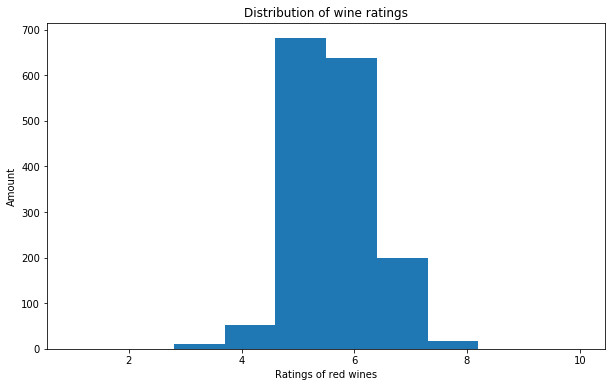

In [41]:
fig = plt.figure(figsize = (10,6))
plt.hist(wine[wine["red"]==1]["quality"].values, range=(1, 10))
plt.xlabel('Ratings of red wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

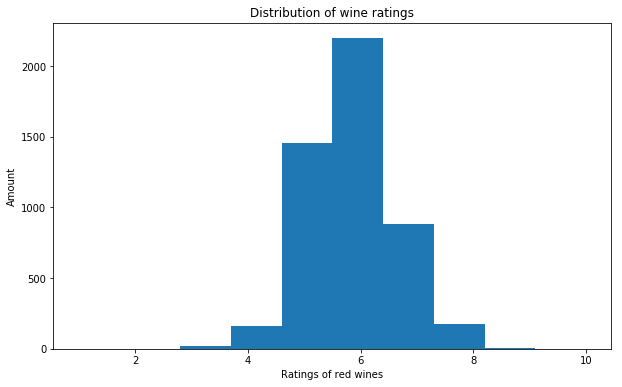

In [42]:
fig = plt.figure(figsize = (10,6))
plt.hist(wine[wine["red"]==0]["quality"].values, range=(1, 10))
plt.xlabel('Ratings of red wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

## Les variables en fonctions de la note de qualité

C:\Users\maxime\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


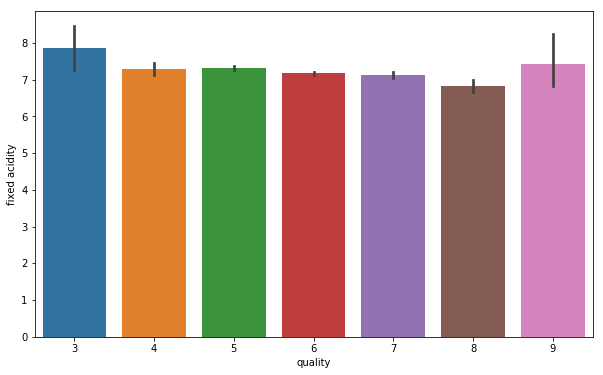

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

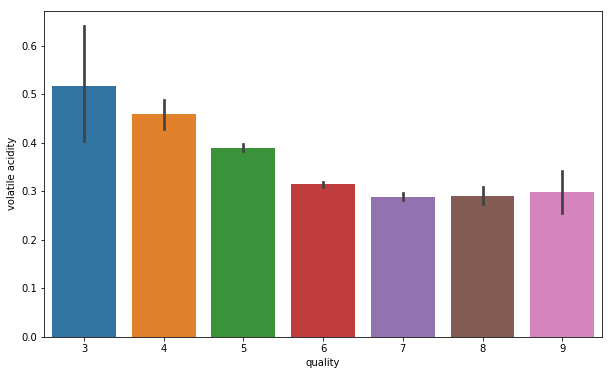

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

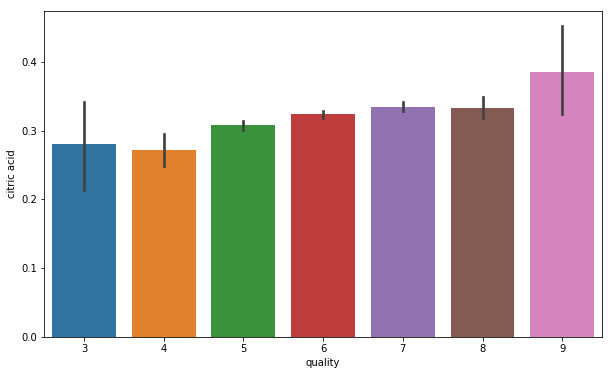

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

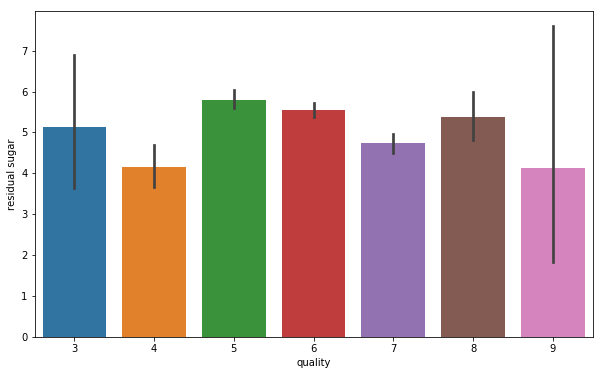

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

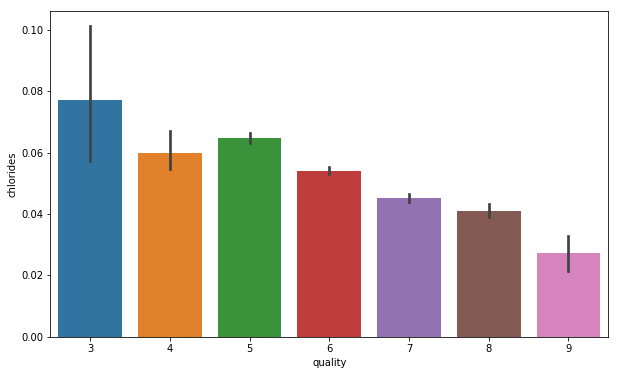

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

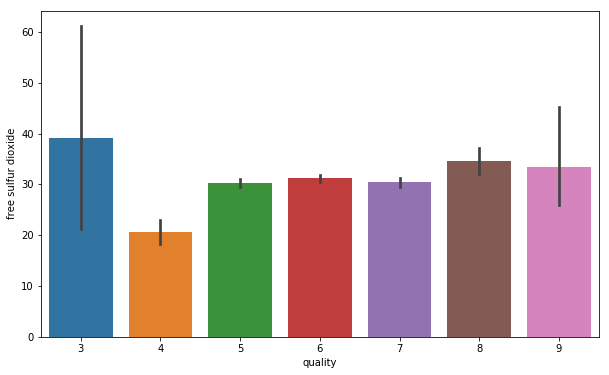

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

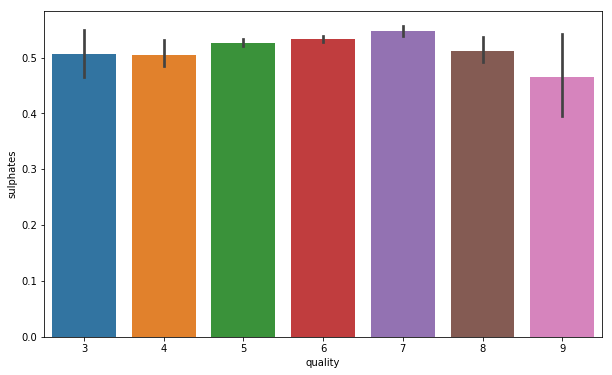

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

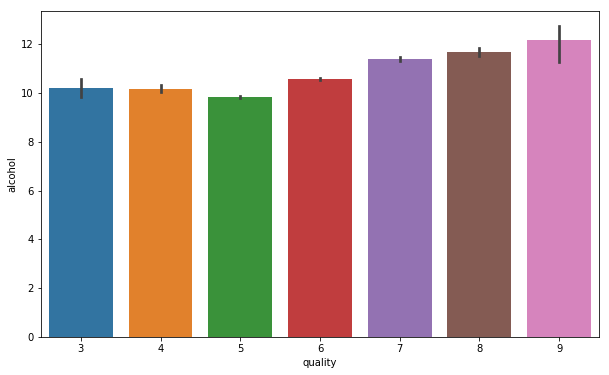

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Séparer le jeu d'apprentissage du jeu de test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
wine_target=wine['quality']
wine_data=wine.drop(columns=['quality'])

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.33)

# Standardiser les valeurs

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

C:\Users\maxime\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\maxime\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\maxime\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [35]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import cross_val_score
score=cross_val_score(svr, wine_data, wine_target, cv=5, n_jobs=-1)

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.28 (+/- 0.01)


In [37]:
from sklearn.model_selection import GridSearchCV

def test_hyperparametres(hyperparametres):
    grid       = GridSearchCV(svm.SVR(), hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [ ]:
hyperparametres = {  'gamma' : [0.01, 0.1, 0.5, 0.8, 1]          ,
                  "kernel" : ['linear', 'poly', 'rbf', 'sigmoid',  ],
                  "C" : [10, 50 ,100]}
test_hyperparametres(hyperparametres)

C:\Users\maxime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Test avec une classification binaire